# Music Classification 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import sklearn

In [20]:
audio_path = '/home/arman/Documents/Goalearn/1_music_classification/archive/Data/genres_original/blues/blues.00000.wav'
sig , sample_rate = librosa.load('./archive/Data/genres_original/blues/blues.00000.wav')
# sig

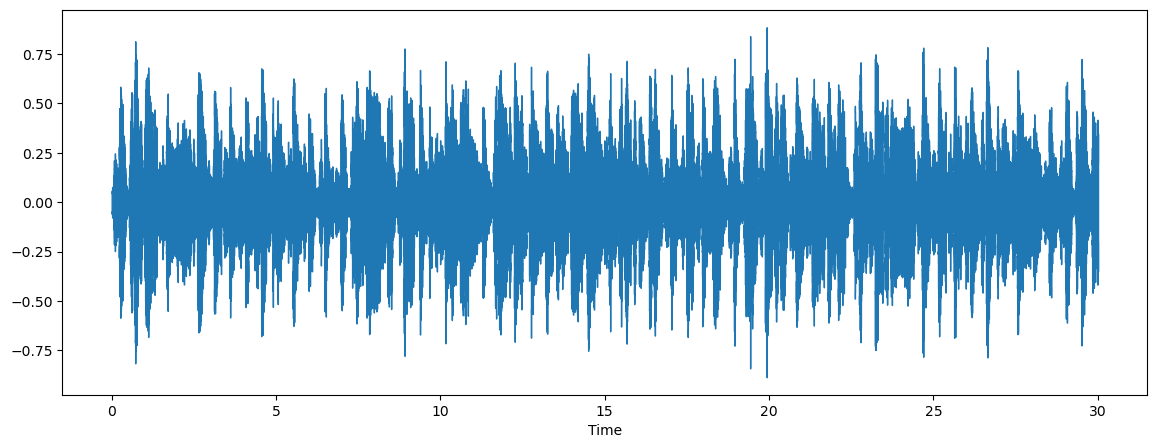

In [21]:

plt.figure(figsize=(14, 5))
librosa.display.waveshow(sig, sr=sample_rate)


In [22]:
ipd.Audio(filename=audio_path,rate=44100,autoplay=True)


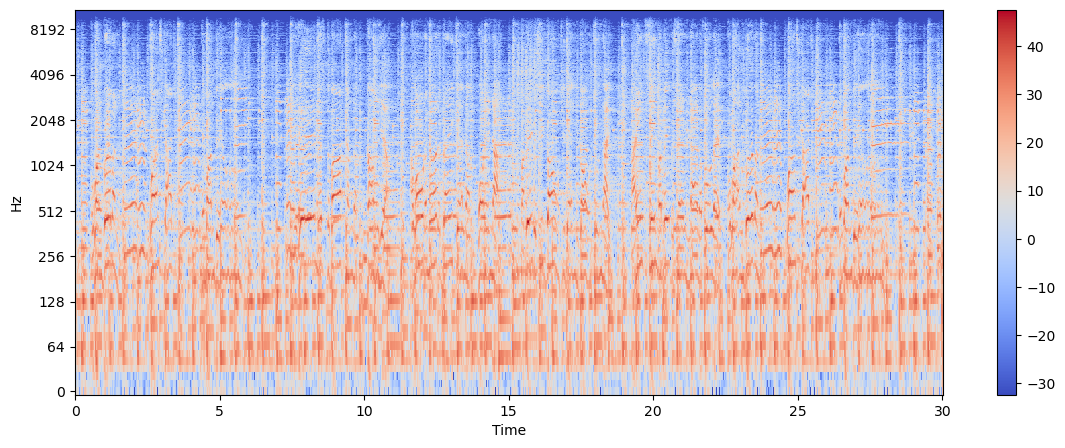

In [23]:
X = librosa.stft(sig)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar()

### computing features and creating the data

In [24]:
# import os
# i=1

# df = pd.DataFrame()
# music_path ='/home/arman/Documents/Goalearn/1_music_classification/archive/Data/genres_original/'
# for dirpath, dnames, fnames in os.walk(music_path):

# #     for f in fnames:
# #     print( fnames,sep='\n**\n')

#     if(dirpath.endswith(('rock','metal'))):
#         target = 0 if dirpath.endswith('rock')  else 1;
#         for fname in fnames:
#             x , sr = librosa.load(os.path.join(dirpath,fname))
#             mfccs = librosa.feature.mfcc(y=x, n_mfcc=20, sr=sample_rate)

#             data={
#                 'index':i,
#                 'song':fname,
#                 'spectral_centroid_mean':np.mean(librosa.feature.spectral_centroid(y=x, sr=sr)),
#                     'spectral_centroid_var':np.var(librosa.feature.spectral_centroid(y=x, sr=sr)),
#                     'spectral_bandwidth_mean':np.mean(librosa.feature.spectral_bandwidth(y=x, sr=sr)),
#                     'spectral_bandwidth_var':np.var(librosa.feature.spectral_bandwidth(y=x, sr=sr)),
#                     'spectral_contrast_mean':np.mean(librosa.feature.spectral_contrast(y=x, sr=sr)),
#                     'spectral_contrast_var':np.var(librosa.feature.spectral_contrast(y=x, sr=sr)),
#                     'spectral_flatness__mean':np.mean(librosa.feature.spectral_flatness(y=x)),
#                     'spectral_flatness__var':np.var(librosa.feature.spectral_flatness(y=x)),
#                     'spectral_rolloff__mean':np.mean(librosa.feature.spectral_rolloff(y=x, sr=sr)),
#                     'spectral_rolloff__var':np.var(librosa.feature.spectral_rolloff(y=x, sr=sr)),
#                     'poly_features_mean':np.mean(librosa.feature.poly_features(y=x, sr=sr)),
#                     'poly_features_var':np.var(librosa.feature.poly_features(y=x, sr=sr)),
#                     'tonnetz_mean':np.mean(librosa.feature.tonnetz(y=x, sr=sr)),
#                     'tonnetz_var':np.var(librosa.feature.tonnetz(y=x, sr=sr)),
#                     'zero_crossing_rate_mean':np.mean(librosa.feature.zero_crossing_rate(y=x, )),
#                     'zero_crossing_rate_var':np.var(librosa.feature.zero_crossing_rate(y=x,)),
#                     'chroma_stft_mean':np.mean(librosa.feature.chroma_stft(y=x, sr=sr)),
#                     'chroma_stft_var':np.var(librosa.feature.chroma_stft(y=x, sr=sr)),
#                     'chroma_cens_mean':np.mean(librosa.feature.chroma_cens(y=x, sr=sr)),
#                     'chroma_cens_var':np.var(librosa.feature.chroma_cens(y=x, sr=sr)),
#                     'harmonic_mean':np.mean(librosa.effects.harmonic(y=x)[0]),
#                     'harmonic_var':np.var(librosa.effects.harmonic(y=x)[0]),
#                     'rms_mean':np.mean(librosa.feature.rms(y=x, )),
#                     'rms_var':np.var(librosa.feature.rms(y=x,)),
#                     'tempogram_mean':np.mean(librosa.feature.tempogram(y=x, sr=sr)),
#                     'tempogram_var':np.var(librosa.feature.tempogram(y=x, sr=sr)),
#                     'percussive_mean':np.mean(librosa.effects.harmonic(y=x)[1]),
# #                     'chroma_cqt_mean':np.mean(librosa.feature.chroma_cqt(y=x, sr=sr)),
# #                     'chroma_cqt_var':np.var(librosa.feature.chroma_cqt(y=x, sr=sr)),
# #                     'chroma_cqt_mean':np.mean(librosa.feature.chroma_cqt(y=x, sr=sr)),
# #                     'chroma_cqt_var':np.var(librosa.feature.chroma_cqt(y=x, sr=sr)),
# #                     'chroma_cqt_mean':np.mean(librosa.feature.chroma_cqt(y=x, sr=sr)),
# #                     'chroma_cqt_var':np.var(librosa.feature.chroma_cqt(y=x, sr=sr)),                      
#                       }
#             for i,mf in enumerate(mfccs):
#                 data[f'mfcc{i+1}_mean']=np.mean(mf)
#                 data[f'mfcc{i+1}_var']=np.var(mf)
#             data['target'] = target

#             new_df = pd.DataFrame(data=data,index=['index'])
#             df=pd.concat([df,new_df])
#             i+=1
# print("DONE!")


In [25]:
# df.to_csv('./rock_metal_features.csv', sep='\t', encoding='utf-8')


In [26]:
df=pd.read_csv('./rock_metal_features.csv',sep='\t')
# df = pd.read_csv('data.csv', index_col=0)
# df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# df=df.drop(columns=['0'])
# print(df)
df

,song,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_contrast_mean,spectral_contrast_var,spectral_flatness__mean,spectral_flatness__var,spectral_rolloff__mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,target
0,rock.00015.wav,2335.519931,1.047257e+06,2098.886433,186228.275885,21.177808,71.180976,0.011207,0.000205,4500.064745,...,64.283356,-8.140871,77.154370,-5.716979,62.045920,-3.350068,47.338276,-0.413566,67.251274,0
1,rock.00043.wav,2739.501165,4.086430e+05,2541.944054,168155.651802,17.492183,24.170977,0.057566,0.003412,5326.736571,...,39.987522,-5.528636,52.814070,-2.527791,55.653250,0.621449,45.646510,-1.402993,54.191658,0
2,rock.00012.wav,1863.764472,8.125101e+05,2067.372180,208396.972829,20.479064,61.282575,0.005664,0.000083,3986.232225,...,52.276466,-9.628988,57.548325,-7.385819,55.118100,-9.435307,38.829110,-3.133871,46.775032,0
3,rock.00014.wav,1937.002368,9.186018e+05,2008.283665,183812.979075,20.277096,55.644334,0.006873,0.000127,3985.824210,...,61.840923,-5.408959,60.290700,-3.248392,43.171024,-3.874889,74.630420,-1.037097,56.567530,0
4,rock.00024.wav,2320.395081,1.184992e+05,2044.918364,45874.139376,21.140232,90.076771,0.008181,0.000029,4466.440973,...,38.334910,-9.139816,29.729967,1.592102,29.976326,-4.125119,31.207390,0.308766,35.249847,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,metal.00036.wav,2685.678093,1.777177e+05,2317.579770,34559.713786,19.875531,105.847683,0.020452,0.000162,5331.258044,...,41.508488,-7.460728,26.306587,5.422094,33.293130,-4.396084,32.895600,3.044864,32.449078,1
196,metal.00065.wav,2760.046330,2.140481e+05,2242.641756,76983.352390,20.980286,86.071234,0.020054,0.000165,5259.580622,...,35.932460,-11.783129,49.324863,1.661150,37.710890,-10.603471,38.996260,-3.778469,36.187263,1
197,metal.00033.wav,2030.487916,3.235349e+05,1929.862421,87748.021977,20.662738,92.377865,0.007699,0.000371,4224.296524,...,64.010020,-0.343230,72.082690,-7.770620,59.801884,0.990668,52.720345,-4.180941,21.496191,1
198,metal.00055.wav,3108.521764,1.075656e+05,2361.478699,46553.981648,20.293606,106.984562,0.035110,0.001881,5699.254323,...,37.411343,-7.142877,30.024181,4.654262,35.386040,-6.511414,44.347664,7.862762,33.422104,1


In [27]:
df.describe()

,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_contrast_mean,spectral_contrast_var,spectral_flatness__mean,spectral_flatness__var,spectral_rolloff__mean,spectral_rolloff__var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,target
count,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2422.476745,3.199076e+05,2252.716471,102705.561017,20.371610,75.480414,0.019229,0.000655,4897.298317,1.289950e+06,...,42.101094,-7.123106,44.346647,1.590899,44.978696,-4.323306,44.121301,-0.161239,42.047824,0.500000
std,465.270430,2.516803e+05,283.630205,92748.877958,1.549384,30.651192,0.018212,0.001166,875.306770,1.183684e+06,...,15.398796,3.540642,22.123339,3.453180,22.322817,3.494511,20.469368,3.663810,20.078993,0.501255
min,1181.326607,4.375263e+04,1568.952472,11146.734295,15.726483,10.217592,0.001295,0.000002,2367.345030,1.019584e+05,...,17.181950,-15.060139,17.213970,-7.839728,15.401896,-16.089869,18.558168,-9.290357,16.508140,0.000000
25%,2146.695740,1.587026e+05,2098.842621,50564.137706,19.597689,62.344825,0.007689,0.000064,4449.077434,6.345778e+05,...,32.111718,-9.508603,30.599457,-1.012055,31.540510,-6.504121,30.754965,-2.750216,30.201986,0.000000
50%,2459.520892,2.535107e+05,2229.707143,76642.753299,20.485078,83.672482,0.013297,0.000144,4983.050495,9.721065e+05,...,37.942109,-7.230934,39.586886,1.693639,39.203216,-4.331604,39.171871,-0.253871,36.308088,0.500000
75%,2743.180479,3.953210e+05,2378.831888,119178.634906,21.273822,97.442246,0.022058,0.000686,5403.562060,1.551120e+06,...,49.590384,-5.112629,50.228516,4.257204,50.785815,-2.320510,52.775516,2.436325,49.815672,1.000000
max,3488.501991,1.757258e+06,3241.578308,694624.872941,24.347189,130.080718,0.117468,0.007361,7659.958219,8.308336e+06,...,130.295060,3.713944,199.191160,9.797574,172.216500,4.238797,180.281800,9.081654,148.711410,1.000000


### Scatter 5  features 

In [32]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x)


hi


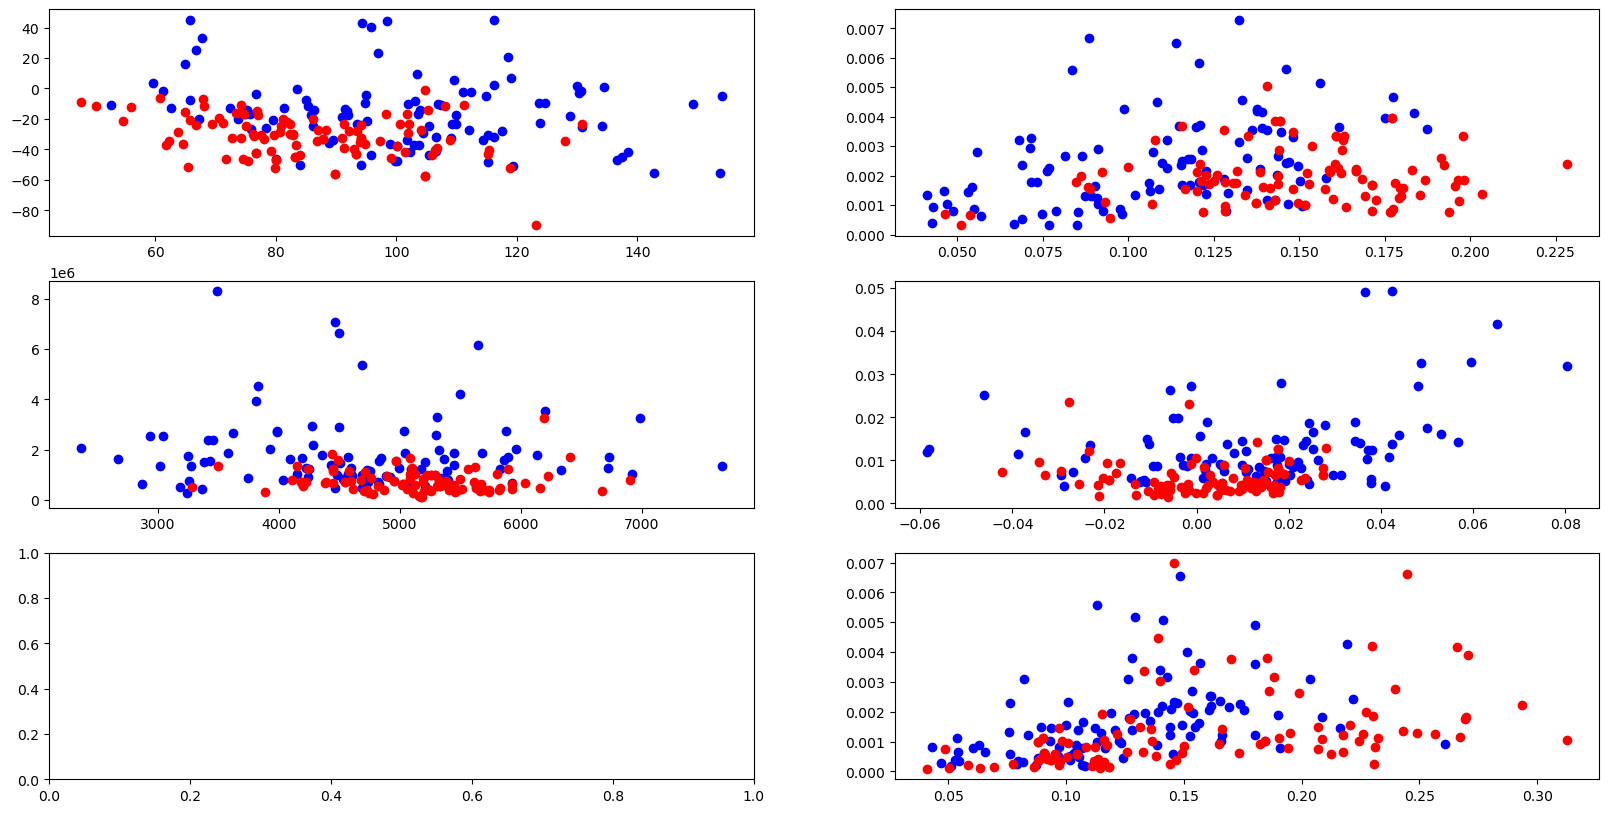

In [33]:
rock=df[df.target==0]
metal=df[df.target==1]
rock.shape

# rock
# fig, ax = plt.subplots(2, 2)
print('hi')

fig, ax = plt.subplots(3, 2)
fig.set_figwidth(20)
fig.set_figheight(10)
ax[0, 0].scatter(rock.mfcc2_mean, rock.mfcc3_mean,  color='blue') #row=0, col=0
ax[0, 0].scatter(metal.mfcc2_mean, metal.mfcc3_mean,  color='red') #row=0, col=0

ax[0, 1].scatter(rock.zero_crossing_rate_mean, rock.zero_crossing_rate_var,  color='blue') #row=0, col=0
ax[0, 1].scatter(metal.zero_crossing_rate_mean, metal.zero_crossing_rate_var,  color='red') #row=0, col=0

ax[1, 0].scatter(rock.spectral_rolloff__mean,rock.spectral_rolloff__var,  color='blue') #row=0, col=0
ax[1, 0].scatter(metal.spectral_rolloff__mean,metal.spectral_rolloff__var,  color='red') #row=0, col=0

ax[1, 1].scatter(rock.tonnetz_mean, (rock.tonnetz_var),  color='blue') #row=0, col=0
ax[1, 1].scatter(metal.tonnetz_mean,(metal.tonnetz_var),  color='red') #row=0, col=0

ax[2, 1].scatter(rock.rms_mean, (rock.rms_var),  color='blue') #row=0, col=0
ax[2, 1].scatter(metal.rms_mean,(metal.rms_var),  color='red') #row=0, col=0

# ax[0, 0].scatter(metal.mfcc1_mean, metal.target,  color='red') #row=0, col=0
# print('hi')

# ax[1, 0].scatter(df.tscore, df.sal,  color='blue') #row=1, col=0
# ax[0, 1].scatter(df.iscore, df.sal,  color='blue')#row=0, col=1
plt.show()
# metal.mfcc1_mean
# type(metal.mfcc1_mean)


In [112]:
# mfccs = librosa.feature.mfcc(y=sig, n_mfcc=20, sr=sample_rate)
# delta=librosa.feature.delta(mfccs)
# print(delta[0])
# np.var(mfccs[1])
sdf=df.loc[:, ~df.columns.isin(['tempogram_mean','tempogram_var','harmonic_var'])]
sdf.shape

(200, 66)

### Normalize data

In [113]:
from sklearn import preprocessing
X=sdf.loc[:, ~sdf.columns.isin(['target', 'song'])]

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X.shape
# ff=pd.DataFrame(data)
# ff

(200, 64)

### Test and Train

In [114]:
from sklearn.model_selection import train_test_split
# X=df.loc[:, ~df.columns.isin(['target', 'song'])]
y=df.target
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (160, 64) (160,)
Test set: (40, 64) (40,)


### Training

Let's start the algorithm with k=4 for now:


In [99]:
from sklearn.neighbors import KNeighborsClassifier
k = 25
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k,weights='distance').fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=25, weights='distance')

### Predicting

We can use the model to make predictions on the test set:


In [100]:
yhat = neigh.predict(X_test)
yhat

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

### Accuracy evaluation

<!-- In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.
 -->

In [101]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  0.9


In [237]:
data=df[['chroma_stft_mean', 'mfcc4_mean', 'poly_features_mean', 'chroma_cens_mean', 'chroma_cens_var']]
y=df.target

        #     print(data)
norm = preprocessing.StandardScaler().fit(data).transform(data.astype(float))
X_train, X_test, y_train, y_test = train_test_split( norm, y, test_size=0.2, random_state=4)
k = 20
#Train Model and Predict  
kneigh = KNeighborsClassifier(n_neighbors = k,weights='distance').fit(X_train,y_train)
yhat = kneigh.predict(X_test)
accur=metrics.accuracy_score(y_test, yhat)
accur

0.975

### Forward Selection

In [300]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# df.iloc[:,0]
dff=df.loc[:, ~df.columns.isin(['target', 'song'])]
y=df.target
tmp=[]

for_sel_colname=[]
for_sel_val=0

for i in range(5):
    tmp=[]
    for col_name in dff:
        if col_name not in for_sel_colname:
#             print(col_name,for_sel_colname,col_name not in for_sel_colname)
            data=dff[[*for_sel_colname,col_name]]
            norm = preprocessing.StandardScaler().fit(data).transform(data.astype(float))
            X_train, X_test, y_train, y_test = train_test_split( norm, y, test_size=0.2, random_state=4)
            k = 20
            #Train Model and Predict  
            kneigh = KNeighborsClassifier(n_neighbors = k,weights='distance').fit(X_train,y_train)
            yhat = kneigh.predict(X_test)
            accur=metrics.accuracy_score(y_test, yhat)
            tmp.append([col_name,accur])
    max_tmp=max(tmp, key=lambda x: x[1])
    for_sel_colname.append(max_tmp[0])
    for_sel_val=max_tmp[1]
    print(for_sel_colname,for_sel_val)




['chroma_stft_mean'] 0.875
['chroma_stft_mean', 'mfcc4_mean'] 0.95
['chroma_stft_mean', 'mfcc4_mean', 'poly_features_mean'] 0.975
['chroma_stft_mean', 'mfcc4_mean', 'poly_features_mean', 'chroma_cens_mean'] 0.975
['chroma_stft_mean', 'mfcc4_mean', 'poly_features_mean', 'chroma_cens_mean', 'chroma_cens_var'] 0.975


### Backward elimination

In [312]:
dff=df.loc[:, ~df.columns.isin(['target', 'song'])]
dff
dff.loc[:, ~dff.columns.isin(['spectral_bandwidth_mean'])]
# df.columns.isin(['spectral_bandwidth_mean'])

,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_var,spectral_contrast_mean,spectral_contrast_var,spectral_flatness__mean,spectral_flatness__var,spectral_rolloff__mean,spectral_rolloff__var,poly_features_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,2335.519931,1.047257e+06,186228.275885,21.177808,71.180976,0.011207,0.000205,4500.064745,2.909157e+06,0.960439,...,0.795939,64.283356,-8.140871,77.154370,-5.716979,62.045920,-3.350068,47.338276,-0.413566,67.251274
1,2739.501165,4.086430e+05,168155.651802,17.492183,24.170977,0.057566,0.003412,5326.736571,1.986257e+06,2.148011,...,-1.413192,39.987522,-5.528636,52.814070,-2.527791,55.653250,0.621449,45.646510,-1.402993,54.191658
2,1863.764472,8.125101e+05,208396.972829,20.479064,61.282575,0.005664,0.000083,3986.232225,2.731982e+06,0.840616,...,-0.815800,52.276466,-9.628988,57.548325,-7.385819,55.118100,-9.435307,38.829110,-3.133871,46.775032
3,1937.002368,9.186018e+05,183812.979075,20.277096,55.644334,0.006873,0.000127,3985.824210,2.689572e+06,0.609813,...,1.700953,61.840923,-5.408959,60.290700,-3.248392,43.171024,-3.874889,74.630420,-1.037097,56.567530
4,2320.395081,1.184992e+05,45874.139376,21.140232,90.076771,0.008181,0.000029,4466.440973,4.828779e+05,2.486028,...,0.386634,38.334910,-9.139816,29.729967,1.592102,29.976326,-4.125119,31.207390,0.308766,35.249847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2685.678093,1.777177e+05,34559.713786,19.875531,105.847683,0.020452,0.000162,5331.258044,5.441480e+05,1.841841,...,8.087853,41.508488,-7.460728,26.306587,5.422094,33.293130,-4.396084,32.895600,3.044864,32.449078
196,2760.046330,2.140481e+05,76983.352390,20.980286,86.071234,0.020054,0.000165,5259.580622,9.721065e+05,1.598684,...,4.872102,35.932460,-11.783129,49.324863,1.661150,37.710890,-10.603471,38.996260,-3.778469,36.187263
197,2030.487916,3.235349e+05,87748.021977,20.662738,92.377865,0.007699,0.000371,4224.296524,6.893252e+05,3.606337,...,-1.671906,64.010020,-0.343230,72.082690,-7.770620,59.801884,0.990668,52.720345,-4.180941,21.496191
198,3108.521764,1.075656e+05,46553.981648,20.293606,106.984562,0.035110,0.001881,5699.254323,4.039208e+05,3.886424,...,9.268199,37.411343,-7.142877,30.024181,4.654262,35.386040,-6.511414,44.347664,7.862762,33.422104


In [347]:
dff=df.loc[:, ~df.columns.isin(['target', 'song'])]
y=df.target
tmp=[]


while len(dff.columns.to_list())>=6:
    for col_name in dff:
        #       print(col_name,for_sel_colname,col_name not in for_sel_colname)
        data=dff.loc[:, dff.columns != col_name] #Exclude col_name column
        
        norm = preprocessing.StandardScaler().fit(data).transform(data.astype(float))
        X_train, X_test, y_train, y_test = train_test_split( norm, y, test_size=0.2, random_state=4)
        k = 20
        #Train Model and Predict  
        kneigh = KNeighborsClassifier(n_neighbors = k,weights='distance').fit(X_train,y_train)
        yhat = kneigh.predict(X_test)
        cur_accur=accur=metrics.accuracy_score(y_test, yhat)
#         print(accur)
        tmp.append([col_name,accur])
#     print(tmp)
    max_tmp=max(tmp, key=lambda x: x[1])    
    dff=dff.drop(columns=(max_tmp[0]))
    tmp=[]

print(cur_accur)
print(dff)

0.825
     mfcc2_mean  mfcc10_mean  mfcc14_mean  mfcc18_mean  mfcc20_mean
0     90.933420     4.335098     7.145129    -5.716979    -0.413566
1     75.873790     5.515676    -3.166598    -2.527791    -1.402993
2    106.975470     8.738428     4.702955    -7.385819    -3.133871
3    103.125040     5.318705     3.425310    -3.248392    -1.037097
4     99.707960    13.512140     1.191212     1.592102     0.308766
..          ...          ...          ...          ...          ...
195   82.339420    17.750357     9.533430     5.422094     3.044864
196   76.771480    18.459010     6.477735     1.661150    -3.778469
197  115.433650    10.240899     4.627135    -7.770620    -4.180941
198   63.716393    18.866392    12.715703     4.654262     7.862762
199  130.878700    13.104675    -0.350114    -4.392724     3.978138

[200 rows x 5 columns]


In [348]:
# dff

In [345]:
data=dff
y=df.target

        #     print(data)
norm = preprocessing.StandardScaler().fit(data).transform(data.astype(float))
X_train, X_test, y_train, y_test = train_test_split( norm, y, test_size=0.2, random_state=4)
k = 20

#Train Model and Predict  
kneigh = KNeighborsClassifier(n_neighbors = k,weights='distance').fit(X_train,y_train)
yhat = kneigh.predict(X_test)
accur=metrics.accuracy_score(y_test, yhat)
accur

0.85